In [2]:
# Initialize the notebook
using Pkg
Pkg.activate("..")
#include("../src/Particles.jl")
using Particles
using Plots
using Zarr
using ZipFile

nothing

  Activating project at `~/verlaan_shared/src/julia/Particles2`


In [4]:
Zarr_data = ZarrData("data","ZUNORMM_map_fullgrid_v3.zarr")
t0=get_reftime(Zarr_data)
h=initialize_interpolation(Zarr_data,"waterlevel",t0)
u=initialize_interpolation(Zarr_data,"x_velocity",t0)
v=initialize_interpolation(Zarr_data,"y_velocity",t0)
nu=initialize_interpolation(Zarr_data,"eddy_visc_z",t0)
s=initialize_interpolation(Zarr_data,"salinity",t0)

nothing

In [63]:
# find the extent of the data
xy_bbox=Zarr_data.xy_grid.bbox
println("bbox=$(xy_bbox)") #bbox=[3.4773802907221345, 5.566420993890162, 51.66065856527758, 52.466444933890344]

#z0=Zarr_data.z_iface_3d[:,:,:,1]
#z0[z0.<-9990].=0.0
#minz = minimum(z0) #scaled
#println("minz=$(minz)")
#maxx = maximum(x)
#minx,
#z[1,1,:,1]
size(z)
#z0[:,:,30]
#z0=Zarr_data.Variables["z_iface_3d"][:,:,:,1]
z0=Zarr_data.file.arrays["z_iface_3d"][:,:,:,1]
z0_scaled=0.01*z0
z0_scaled[z0.<-9990].=0.0
z0_min=minimum(z0_scaled,dims=3)
z0_min
heatmap(z0_min[:,:,1]')
#Zarr_data.file.arrays["z_iface_3d"].attrs
t=Zarr_data.file.arrays["time"][:] #"seconds since 2022-04-01 00:00:00 +00:00"
t0,(t[2]-t[1])/3600.0, (t[end]-t[2])/3600.0/24.0 #2022-04-16 step=2hrs until 2022-05-01

Zarr_data.file.arrays["salinity"].attrs

bbox=[3.4773802907221345, 5.566420993890162, 51.66065856527758, 52.466444933890344]


Dict{String, Any} with 12 entries:
  "cell_methods"      => "mesh2d_nFaces: mean"
  "long_name"         => "Salinity in flow element"
  "scale_factor"      => 0.01
  "location"          => "face"
  "add_offset"        => 0.0
  "standard_name"     => "sea_water_salinity"
  "coordinates"       => "time z_center y_center x_center"
  "mesh"              => "mesh2d"
  "_FillValue"        => 9999
  "units"             => "1e-3"
  "_ARRAY_DIMENSIONS" => Any["time", "z", "y", "x"]
  "grid_mapping"      => "wgs84"

t=0.0 t=7200.0 

t=14400.0 t=21600.0 

t=28800.0 t=36000.0 

t=43200.0 

┌ Info: Saved animation to /home/verlaan/verlaan_shared/src/julia/Particles2/case_zunormm/rmm.gif
└ @ Plots /home/verlaan/.julia/packages/Plots/QWCV6/src/animation.jl:156


Plots.AnimatedGif("/home/verlaan/verlaan_shared/src/julia/Particles2/case_zunormm/rmm.gif")
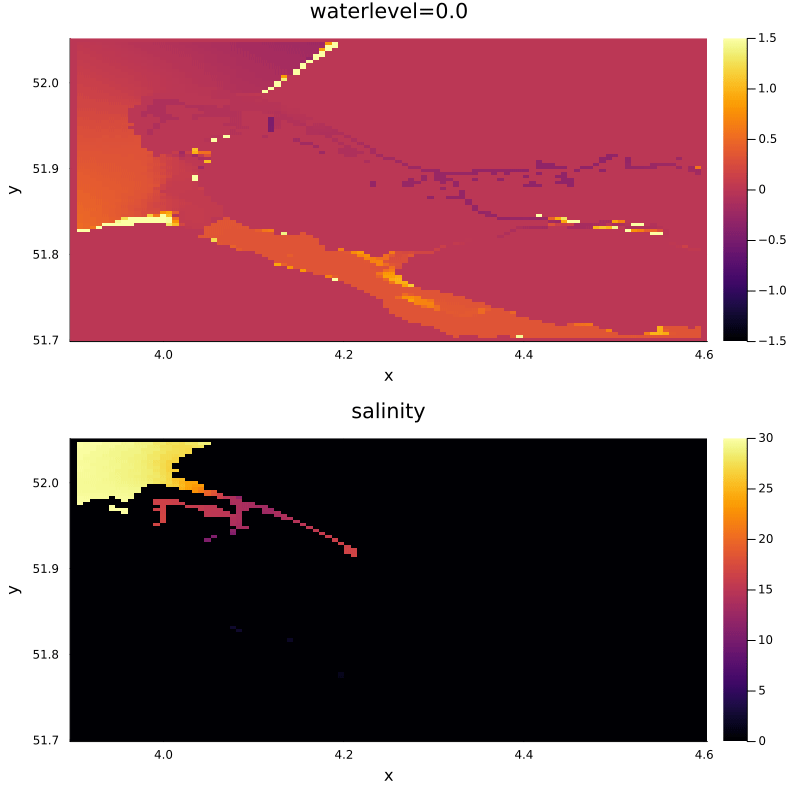

In [11]:
x_left = 3.9
x_right = 4.6
y_bot = 51.7
y_top = 52.05
z_surface = 0.0
z_bottom = -40.0
t_start=0.0
t_step=2*3600.0
#t_stop=15*24*3600.0 # end of dataset at 15 days
t_stop=12*3600.0 # 12 hours

# This is using the interpolation functions instead of plotting the data directly, which is much faster.
anim = @animate for t in range(t_start, stop = t_stop, step = t_step)
    if t%1200==0 print("t=$(t) ") end
    # grid for plotting only
    x_points = range(x_left,stop=x_right,length=100) #only show 100 points in x
    y_points = range(y_bot,stop=y_top,length=100)
    z        = -2.0
    #u_interp = [u(x,y_middle,z,t) for x in x_points, z in z_points] # x velocity
    h_interp = [h(x,y,z,t) for x in x_points, y in y_points] # water level
    s_interp = [s(x,y,z,t) for x in x_points, y in y_points] # salinity

    l = @layout([a; b])
    p1=heatmap(x_points,y_points,h_interp',xlabel="x",ylabel="y",title="waterlevel=$(t)",clims=(-1.5,1.5))
    p2=heatmap(x_points,y_points,s_interp',xlabel="x",ylabel="y",title="salinity",clims=(0,30))
    plot(p1,p2,layout=l,size=(800,800))
end

# save the animation as a gif
# note that we keep the resolution low because the data is being interpolated on the fly
gif(anim, "./rmm.gif", fps = 3)


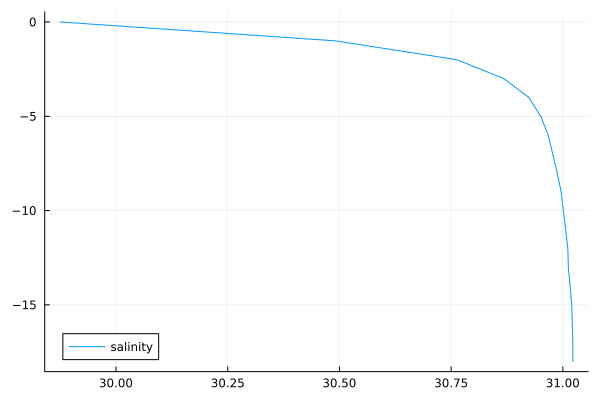

In [12]:
# plot a profile 
xp=4.0
yp=52.0
tp=2*3600.0
z_points=collect(-18.0:1.0:0.0)
s_profile = [s(xp,yp,z,tp) for z in z_points] # salinity

plot(s_profile,z_points,label="salinity")

In [16]:
# direct plot of surface salinity at first time step - faster and nicer than using interpolation

s0=Zarr_data.file.arrays["salinity"][:,:,46,1] #999 x 499 x 46 x 181
s0_scaled=0.01*s0
s0_scaled[s0 .> 9990].=NaN
x=Zarr_data.file.arrays["x_center"][:]
y=Zarr_data.file.arrays["y_center"][:]

heatmap(x,y,s0_scaled',aspect_ratio=:equal,clim=(0,40),color=:viridis,size=(1400,800))
#savefig("salinity.png")

"/home/verlaan/verlaan_shared/src/julia/Particles2/case_zunormm/salinity.png"